### 1.matplotlib 介绍
Matplotlib是一个Python 2D绘图库，可以生成各种硬拷贝格式和跨平台交互式环境的出版物质量数据。Matplotlib可用于Python脚本，Python和IPython shell，Jupyter笔记本，Web应用程序服务器和四个图形用户界面工具包。

Matplotlib试图让简单易事的事情成为可能。你只需几行代码即可生成绘图，直方图，功率谱，条形图，误差图，散点图等。有关示例，请参阅示例图库和缩略图库。

对于简单的绘图，pyplot模块提供类似MATLAB的接口，特别是与IPython结合使用时。 对于高级用户，你可以通过面向对象的界面或通过MATLAB用户熟悉的一组函数完全控制线型，字体属性，轴属性等。

### 2. 认识matplotlib

![](img/anatomy.png)

该图**记录了所有子轴，一些 “特殊” 的艺术家（标题，图形图例等）和画布**。（不要过于担心画布，它是至关重要的，因为它实际上是绘图的对象，以获得你绘制的图像，但作为用户它或多或少是你不可见的）。一个数字可以有任意数量的Axes，但是有用的应该至少有一个。

#### Axes对象
这就是你想象中的“一幅图”，它是具有数据空间的图像区域。给定的图形可以包含许多轴，但给定的Axes对象只能在一个图中。 Axes包含两个（或3D的三个）Axis对象（注意Axes和Axis之间的差异），它们负责数据限制（数据限制也可以通过 `set_xlim()` 和 `set_ylim()` 来设置Axes方法）。每个Axes都有一个标题（通过 `set_title()` 设置），一个x标签（通过 `set_xlabel()` 设置）和一个通过 `set_ylabel()` 设置的y标签。

#### Axis对象
这些是类似数字的对象。它们负责设置图形限制并生成刻度线（轴上的标记）和ticklabels（标记刻度线的字符串）。刻度线的位置由`Locator`对象确定，ticklabel字符串由`Formatter`格式化。正确的定位器和格式化器的组合可以非常精确地控制刻度位置和标签。

#### Artist对象
基本上你在图上看到的一切都是艺术家（Artist）对象（甚至是图，轴和轴对象）。这包括Text对象，Line2D对象，集合对象，Patch对象......（现在你明白了）。渲染图形时，所有艺术家都被绘制到画布（canvas）上。大多数艺术家（Artist）都与轴有关; 这样的艺术家（Artist）不能被多个轴共享，也不能从一个轴移动到另一个轴。

### 绘制函数的输入类型
所有绘图函数都需要np.array或np.ma.masked_array对象作为输入类型。如果是 “类数组（array-like）” 对象（如pandas数据对象和np.matrix）可能会或可能不会按预期工作。最好在绘图之前将它们转换为np.array对象。

例如，要转换pandas.DataFrame
```Python
a = pandas.DataFrame(np.random.rand(4,5), columns = list('abcde'))
a_asndarray = a.values
```

以及转换np.matrix
```python
b = np.matrix([[1,2],[3,4]])
b_asarray = np.asarray(b)
```

### Matplotlib，pyplot和pylab：它们之间有什么关系？
Matplotlib是整个包; matplotlib.pyplot 是 matplotlib中的一个模块; 和pylab是一个与 matplotlib 一起安装的模块。

pyplot为底层面向对象的绘图库提供状态机接口。 状态机隐式地自动创建图形和轴以实现所需的图形。例如：

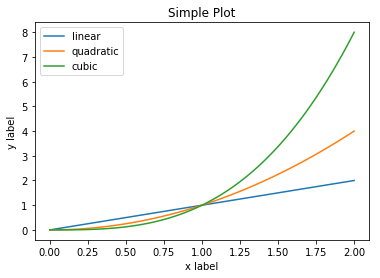

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 2, 100)
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()
plt.show()

第一次调用 plt.plot 将自动创建必要的图形和轴以实现所需的绘图。随后对plt.plot的调用会重新使用当前轴，并且每次都会添加另一行。设置标题，图例和轴标签还会自动使用当前轴并设置标题，创建图例并分别标记轴。

pylab是一个便利模块，它在单个名称空间中批量导入 matplotlib.pyplot（用于绘图）和numpy一样（用于数学和使用数组）。不过不推荐使用pylab，并且由于命名空间污染而强烈建议不要使用它。请改用pyplot。


### 代码风格
查看此文档和示例时，您将找到不同的代码样式和使用模式。这些风格完全没有问题，各有利弊。几乎所有示例都可以转换为另一种样式并实现相同的结果。唯一需要注意的是避免为自己的代码混合了别的代码风格，尽量保持风格的统一。

注意：matplotlib的开发人员必须遵循特定的编程风格和指导原则。请参见Matplotlib开发人员手册。

在不同的风格中，有两种是官方支持的。因此，这些是使用matplotlib的首选方法。

对于pyplot样式，脚本顶部的通常导入：
```python
import matplotlib.pyplot as plt
import numpy as np
```
然后调用一次，例如，np.arange，np.zeros，np.pi，plt.figure，plt.plot，plt.show等。使用pyplot接口创建图像，然后使用对象方法：
```python
x = np.arange(0, 10, 0.2)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()
```
那么，为什么所有都是额外的类型而不是MATLAB样式(依赖于全局状态和平面名称空间)呢？对于像这个例子这样非常简单的事情，唯一的好处是学术性的：更冗长的风格更明确，更清楚地说明事物从何而来，以及正在发生的事情。对于更复杂的应用程序，这种明确性和明确性变得越来越有价值，而更丰富和更完整的面向对象接口可能会使程序更易于编写和维护。
```python
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

# which you would then use as:

data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})
```
或者如果你想有两个小子图：
```python
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})
```

### 后端(Backends)
#### 什么是后端?
网站和邮件列表中的许多文档都提到了“后端（Backends）”，许多新用户对这个术语感到困惑。matplotlib针对许多不同的用例和输出格式。有些人在python shell中以交互方式使用matplotlib，并在键入命令时弹出绘图窗口。有些人运行Jupyter笔记本并绘制内联图以进行快速数据分析。其他人将matplotlib嵌入到图形用户界面（如wxpython或pygtk）中以构建丰富的应用程序。有些人在批处理脚本中使用matplotlib从数值模拟生成postscript图像，还有一些人运行Web应用程序服务器来动态提供图形。

为了支持所有这些用例，matplotlib可以针对不同的输出，并且这些功能中的每一个都称为后端（Backends）; “前端（frontend）”是面向用户的代码，即绘图代码，而“后端（Backends）”完成幕后的所有艰苦工作以制作图形。 有两种类型的后端：用户界面后端（用于pygtk，wxpython，tkinter，qt4或macosx;也称为“交互式后端”）和硬拷贝后端来制作图像文件（PNG，SVG，PDF，PS; 也被称为“非交互式后端”）。
> http://vra.github.io/2017/06/13/mpl-backend/